In [3]:
! pip install openai

In [4]:
! pip install langchain_community

In [5]:
! pip install langchain_chroma

In [4]:
! pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.7 MB/s eta 0:00:00


In [2]:
! pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.7/408.7 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.13
    Uninstalling langchain-core-0.3.13:
      Successfully uninstalled langchain-core-0.3.13
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.4
    Uninstalling langchain-0.3.4:
      Successfully uninstalled langchain-0.3.4


In [20]:
! pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.7/615.7 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.1 MB/s eta 0:00:

Why step-back prompting?

RAG models excel at combining retrieved information with their own knowledge to answer questions. However, they can struggle with complex or poorly phrased questions.

Step-back prompting addresses this by encouraging the model to:

Abstract the question: Instead of directly attempting to answer, the model rephrases it into a more general, underlying question.

Leverage broader knowledge: This reformulated question allows the model to tap into its wider knowledge base for relevant information.

Improve answer accuracy: By understanding the core concept behind the question, the model can generate more accurate and informative responses.

What is step-back prompting?
Step-back prompting involves a two-stage process:

Paraphrasing to a generic question: The model is prompted to rewrite the user’s question into a more general one. This step helps uncover the underlying concept or principle.

Answering the reformulated question: The model generates a comprehensive answer to the original user query using the step-back question and retrieved information.

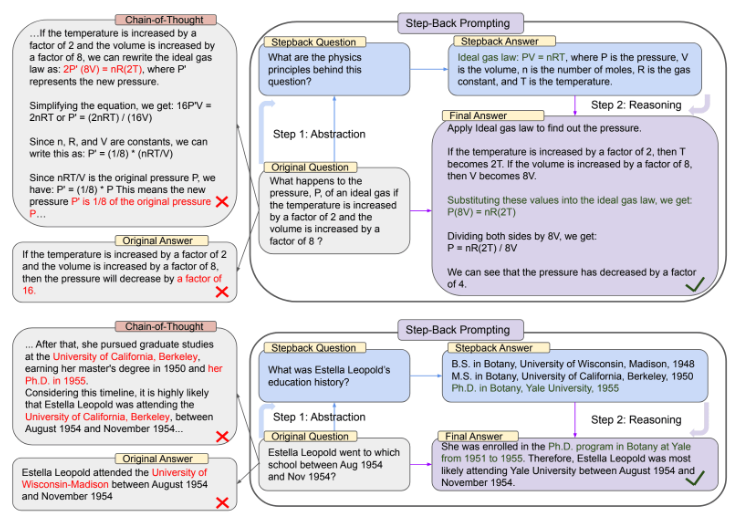

# Import necessary libraries

In [30]:
import os
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, FewShotChatMessagePromptTemplate
from langchain_core.runnables import RunnableLambda
from langchain_openai import ChatOpenAI
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper
from langchain import hub

# Set up the OpenAI API key

In [31]:
OPENAI_API_KEY = os.environ["OPENAI_API_KEY"] = ""  # Add your OpenAI API key
if OPENAI_API_KEY == "":
    raise ValueError("Please set the OPENAI_API_KEY environment variable")

# Few-shot learning for step-back prompting

As mentioned earlier, step-back prompting involves guiding the model to rephrase a question into a more generic one. Here, we’ll provide the model with examples to learn this pattern.

We define a list of examples, each containing an "input" question and a corresponding "output" reformulated question. These examples help illustrate how to transform specific queries into more general ones.

The ChatPromptTemplate.from_messages function creates a template from the examples. It specifies the format of the conversation, mapping the "input" to the human message and the "output" to the AI message.

The FewShotChatMessagePromptTemplate combines the example prompt structure with specific examples. This prepares the model to learn the concept of step-back prompting by helping them understand how to reformulate questions based on the provided examples.


In [32]:
examples = [
    {
        "input": "Did the Beatles ever write a book?",
        "output": "What types of creative works did the Beatles produce?"
    },
    {
        "input": "Was Albert Einstein a musician?",
        "output": "What fields did Albert Einstein work in?"
    }
]

example_prompt = ChatPromptTemplate.from_messages(
    [
        ("human", "{input}"),
        ("ai", "{output}"),
    ]
)

few_shot_prompt = FewShotChatMessagePromptTemplate(
    example_prompt=example_prompt,
    examples=examples,
)

# Build the step-back prompt

Now that the model has some training examples for step-back prompting, we can create the prompt itself. This prompt will instruct the model to paraphrase the user’s question into a more general one.

This code block initializes a prompt using the ChatPromptTemplate.from_messages function. The prompt sets the stage for the conversation and includes:

An introduction from the system explaining the task for the model to paraphrase questions. Inclusion of the few_shot_prompt, which contains examples of paraphrased questions for training the model.

A placeholder ({question}) for the user’s actual question.

We define a pipeline (question_gen) that connects the prompt to the ChatOpenAI service. This pipeline utilizes the OpenAI API to generate a step-back question based on the user’s input and the learned patterns from the provided examples.

We specify the user’s question ("Did Leonardo da Vinci invent the printing press?") to be used as input for generating a step-back question.

We invoke the question_gen pipeline with the user’s question. This triggers the model to generate a paraphrased, step-back question based on the provided examples and the user’s input.

In [38]:
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """You are an expert at world knowledge. Your task is to step back and paraphrase a question to a more generic step-back question, which is easier to answer. Here are a few examples:""",
        ),
        few_shot_prompt,
        ("user", "{question}"),
    ]
)

question_gen = prompt | ChatOpenAI(temperature=0) | StrOutputParser()

question = "Did Lionel Messi win Wimbledon championship?"

question_gen.invoke({"question": question})

'What sports has Lionel Messi excelled in?'

# Retrieve information

We’ve formulated the step-back question. Now, it’s crucial to gather relevant information to answer the user’s query effectively. This step involves retrieving information from the web using both the original and the step-back question.

We define a search object using the DuckDuckGoSearchAPIWrapper with a maximum of 4 results. This object is responsible for conducting web searches.

We define a retriever function that takes a query as input and returns the results of a search conducted through the DuckDuckGoSearchAPIWrapper.

We call the retriever function with the original user question to gather information from the web.

We call the retriever function with the step-back question generated by question_gen.invoke({"question": question}) to gather additional information from the web.

In [35]:
! pip install duckduckgo_search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 33.3 MB/s eta 0:00:00


In [39]:
search = DuckDuckGoSearchAPIWrapper(max_results=4)

def retriever(query):
    return search.run(query)

retriever(question)

retriever(question_gen.invoke({"question": question}))

'A tribute to the 20-year career of Lionel Messi, the most decorated player of all time. Relive his best performances for Argentina and Barcelona, from his debut to his World Cup glory. The Argentina captain won his eighth FIFA award in 2023, 15 years after his first. Learn how he transformed from a wide forward to a false No. 9 and became one of the best players of all time. Lionel Messi acknowledged he has reinvented his style of play since joining Inter Miami CF in order to adapt to Major League Soccer in the closing stretch of his career. Messi, 37, joined Miami as ... Lionel Messi is an Argentinian soccer player who has played for FC Barcelona, Paris Saint-Germain, and currently, the MLS club Inter Miami CF as well as the Argentina national team.'

# Build the RAG chain

Now that we have retrieved information for both the original and step-back questions, it’s time to assemble the full RAG chain. This chain will utilize the retrieved information and step-back prompting to generate a comprehensive answer to the user’s query.

The response_prompt is fetched from the LangChain community hub using the provided URL.

This block of code defines the RAG chain, comprising several steps:

Context retrieval:

normal_context: This step retrieves search results using the original user question (question) through the retriever function.

step_back_context: This step retrieves search results using the generated step-back question (question_gen).

question: This step simply passes on the original user question for further processing.

Step-back answer prompt: The response_prompt is integrated into the chain, guiding the model on utilizing retrieved contexts and the original question to formulate an answer.

Answer generation: The chain incorporates the retrieved contexts and the original question, feeding them into ChatOpenAI to generate the answer.

Output parsing: The generated answer is extracted as a string using StrOutputParser.

The RAG chain is invoked with the user’s question.

In [40]:
response_prompt = hub.pull("langchain-ai/stepback-answer")

chain = (
    {
        "normal_context": RunnableLambda(lambda x: x["question"]) | retriever,
        "step_back_context": question_gen | retriever,
        "question": lambda x: x["question"],
    }
    | response_prompt
    | ChatOpenAI(temperature=0)
    | StrOutputParser()
)

chain.invoke({"question": question})

"No, Lionel Messi did not win the Wimbledon championship. Messi is a professional footballer who plays for Inter Miami in Major League Soccer and the Argentina national team. His achievements are primarily in the sport of soccer, where he has won numerous individual awards and team trophies, including the FIFA World Cup with Argentina in 2022. Winning the Wimbledon championship, which is a prestigious tennis tournament, is not a part of Messi's career accomplishments."